In [40]:
import warnings
warnings.filterwarnings('ignore')

In [41]:
!pip install BERTopic

In [42]:
import pandas as pd
import os
import plotly.express as px
import plotly
import seaborn as sns
import numpy as np
import tqdm
import datetime

pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_colwidth', 5000)

import plotly.io as pio
pio.templates.default = 'simple_white'
from bertopic import BERTopic

In [43]:
df = pd.read_csv('https://raw.githubusercontent.com/gsdavis1959/Data/master/20200325_counsel_chat.csv')
df.head()

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split
0,0,Can I change my feeling of being worthless to everyone?,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?",https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,"Sherry Katz, LCSWCouples and Family Therapist, LCSW",https://counselchat.com/therapists/sherry-katz-lcsw,"If everyone thinks you're worthless, then maybe you need to find new people to hang out with.Seriously, the social context in which a person lives is a big influence in self-esteem.Otherwise, you can go round and round trying to understand why you're not worthless, then go back to the same crowd and be knocked down again.There are many inspirational messages you can find in social media. Maybe read some of the ones which state that no person is worthless, and that everyone has a good purpose to their life.Also, since our culture is so saturated with the belief that if someone doesn't feel good about themselves that this is somehow terrible.Bad feelings are part of living. They are the motivation to remove ourselves from situations and relationships which do us more harm than good.Bad feelings do feel terrible. Your feeling of worthlessness may be good in the sense of motivating you to find out that you are much better than your feelings today.",1,2899,train
1,0,Can I change my feeling of being worthless to everyone?,"I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n How can I change my feeling of being worthless to everyone?",https://counselchat.com/questions/can-i-change-my-feeling-of-being-worthless-to-everyone,depression,"Robin Landwehr, DBH, LPCC, NCCMental Health in a Primary Care Setting",https://counselchat.com/therapists/robin-landwehr-dbh-lpcc-ncc,"Hello, and thank you for your question and seeking advice on this. Feelings of worthlessness is unfortunately common. In fact, most people, if not all, have felt this to some degree at some point in their life. You are not alone. Changing our feelings is like changing our thoughts - it's hard to do. Our minds are so amazing that the minute you change your thought another one can be right there to take it's place. Without your permission, another thought can just pop in there. The new thought may feel worse than the last one! My guess is that you have tried several things to improve this on your own even before reaching out on here. People often try thinking positive thoughts, debating with their thoughts, or simply telling themselves that they need to ""snap out of it"" - which is also a thought that carries some self-criticism. Some people try a different approach, and there are counselors out there that can help you with this. The idea is that instead of trying to change the thoughts, you change how you respond to them. You learn skills that allow you to manage difficult thoughts and feelings differently so they don't have the same impact on you that they do right now. For some people, they actually DO begin to experience less hurtful thoughts once they learn how to manage the ones they have differently. Acceptance and Commitment Therapy may be a good choice for you. There is information online and even self-help books that you can use to teach you the skills that I mentioned. Because they are skills, they require practice, but many people have found great relief and an enriched life by learning them. As for suicidal thoughts, I am very glad to read that this h

In [44]:
df.questionText.astype(str)

0       I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n   How can I change my feeling of being worthless to everyone?
1       I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n   How can I change my feeling of being worthless to everyone?
2       I'm going through some things with my feelings and myself. I barely sleep and I do nothing but think about how I'm worthless and how I shouldn't be here.\n   I've never tried or contemplated suicide. I've always wanted to fix my issues, but I never get around to it.\n   How can I change my feeling of being worthl

In [45]:
docs = list(df.questionText)

In [46]:
%%time

topic_model = BERTopic()
topics, ini_probs = topic_model.fit_transform(docs)

CPU times: user 1min 39s, sys: 6.12 s, total: 1min 45s
Wall time: 1min 42s


In [47]:
num_topics = len(topic_model.get_topics()) - 1
num_topics

91

In [48]:
topic_model.get_topic_info().head(10).set_index('Topic')[['Count', 'Name', 'Representation']]

,Count,Name,Representation
Topic,,,
-1,205,-1_he_him_to_and,"[he, him, to, and, with, my, on, talk, me, the]"
0,61,0_address_history_many_issues,"[address, history, many, issues, counseling, have, lifetime, insomniac, breast, 35]"
1,49,1_feel_happy_its_sad,"[feel, happy, its, sad, emotion, like, screaming, cant, thats, own]"
2,48,2_he_his_him_we,"[he, his, him, we, with, the, that, exwife, and, me]"
3,45,3_you_therapist_train_treatment,"[you, therapist, train, treatment, give, able, how, right, know, would]"
4,43,4_terminate_client_counselor_decide,"[terminate, client, counselor, decide, working, sessions, end, does, counseling, when]"
5,40,5_girl_gender_gay_accept,"[girl, gender, gay, accept, born, boy, tell, like, know, transgender]"
6,39,6_graduate_people_confident_answer,"[graduate, people, confident, answer, meet, am, message, they, wellpublished, accounts]"
7,38,7_during_cry_therapy_normal,"[during, cry, therapy, normal, people, it, is, just, or, for]"


In [49]:
topic_model.visualize_barchart(top_n_topics = 16, n_words = 10)

In [51]:
topics_per_class = topic_model.topics_per_class(docs, classes=df.topic)
fig = topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=10,
                                      normalize_frequency = True)

fig.write_html('basic.html')
fig.show()

In [52]:
df['basic_topic'] = topics

In [53]:
def get_topic_stats(topic_model, extra_cols = []):
    topics_info_df = topic_model.get_topic_info().sort_values('Count', ascending = False)
    topics_info_df['Share'] = 100.*topics_info_df['Count']/topics_info_df['Count'].sum()
    topics_info_df['CumulativeShare'] = 100.*topics_info_df['Count'].cumsum()/topics_info_df['Count'].sum()
    return topics_info_df[['Topic', 'Count', 'Share', 'CumulativeShare', 'Name', 'Representation'] + extra_cols]

In [54]:
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired, PartOfSpeech, MaximalMarginalRelevance

main_representation_model = KeyBERTInspired()
aspect_representation_model1 = PartOfSpeech("en_core_web_sm")
aspect_representation_model2 = [KeyBERTInspired(top_n_words=30), MaximalMarginalRelevance(diversity=.5)]

representation_model = {
   "Main": main_representation_model,
   "Aspect1":  aspect_representation_model1,
   "Aspect2":  aspect_representation_model2
}

vectorizer_model = CountVectorizer(min_df=5, stop_words = 'english')
topic_model = BERTopic(nr_topics = 'auto', vectorizer_model = vectorizer_model,
                      representation_model = representation_model)
topics, ini_probs = topic_model.fit_transform(docs)

In [55]:
num_topics = len(topic_model.get_topics()) - 1
num_topics

14

In [56]:
get_topic_stats(topic_model, ['Aspect1', 'Aspect2']).head(7).set_index('Topic')

,Count,Share,CumulativeShare,Name,Representation,Aspect1,Aspect2
Topic,,,,,,,
0,1604,75.34,75.34,0_relationship_depressed_believe_love,"[relationship, depressed, believe, love, away, abuse, upset, married, afraid, family]","[years, life, relationship, love, family, self, abuse, lot, friends, times]","[relationship, depressed, believe, abuse, afraid, stress, times, havent, house, things]"
-1,187,8.78,84.12,-1_relationship_sex_afraid_girlfriend,"[relationship, sex, afraid, girlfriend, having, ask, wants, guy, getting, thinking]","[lot, relationship, time, help, men, school, years, wrong, girl, things]","[sex, afraid, ask, wants, guy, stress, feel, depressed, normal, 20s]"
1,68,3.19,87.32,1_tell_family_afraid_wont,"[tell, family, afraid, wont, told, want, im, dont, say, try]","[girl, men, family, sex, happy, friends, things, okay, way, girlfriend]","[family, afraid, wont, say, try, teenager, believe, depressed, wrong, abuse]"
2,45,2.11,89.43,2_need_understand_like_know,"[need, understand, like, know, point, ive, right, look, , ]","[right, point, , , , , , , , ]","[need, understand, like, know, point, ive, right, look, , , , , , , , , , , , , , , , , , , , , , ]"
3,36,1.69,91.12,3_relationship_upset_friends_wrong,"[relationship, upset, friends, wrong, girlfriend, friend, past, feelings, angry, really]","[friend, wrong, friends, relationship, things, angry, school, past, feelings, bad]","[relationship, upset, friends, past, feelings, told, sex, girl, thought, man]"
4,32,1.50,92.63,4_stress_teenager_self_20s,"[stress, teenager, self, 20s, school, abuse, going, feel, friends, try]","[school, stress, years, times, late, reason, friends, teenager, year, problem]","[stress, teenager, abuse, feel, friends, try, dont, like, past, angry]"
5,31,1.46,94.08,5_daughter_child_school_normal,"[daughter, child, school, normal, feels, girlfriend, afraid, thing, dont, going]","[afraid, daughter, thing, school, normal, girlfriend, child, way, , ]","[child, school, normal, feels, girlfriend, afraid, thing, dont, know, says]"


In [57]:
topic_model.visualize_barchart(top_n_topics = 14, n_words = 10)

In [58]:
df['basic_topic'] = topics

In [59]:
topic_model.visualize_topics()

In [62]:
topic_model.visualize_heatmap(n_clusters = 4)

In [63]:
from sklearn.metrics.pairwise import cosine_similarity

In [64]:
distance_matrix = cosine_similarity(np.array(topic_model.topic_embeddings_))

In [65]:
dist_df = pd.DataFrame(distance_matrix, columns=topic_model.topic_labels_.values(),
                       index=topic_model.topic_labels_.values())

In [66]:
tmp = []
for rec in dist_df.reset_index().to_dict('records'):
    t1 = rec['index']
    for t2 in rec:
        if t2 == 'index':
            continue
        tmp.append(
            {
                'topic1': t1,
                'topic2': t2,
                'distance': rec[t2]
            }
        )

pair_dist_df = pd.DataFrame(tmp)

In [67]:
pair_dist_df = pair_dist_df[(pair_dist_df.topic1.map(lambda x: not x.startswith('-1'))) &
            (pair_dist_df.topic2.map(lambda x: not x.startswith('-1')))]

In [68]:
pair_dist_df = pair_dist_df[pair_dist_df.topic1 < pair_dist_df.topic2]

In [69]:
pair_dist_df.sort_values('distance', ascending = False).head(30)

,topic1,topic2,distance
20,0_relationship_depressed_believe_love,4_stress_teenager_self_20s,0.53
26,0_relationship_depressed_believe_love,10_angry_feel_relationship_past,0.51
186,11_daughter_child_normal_20s,5_daughter_child_school_normal,0.50
18,0_relationship_depressed_believe_love,2_need_understand_like_know,0.48
17,0_relationship_depressed_believe_love,1_tell_family_afraid_wont,0.44
67,3_relationship_upset_friends_wrong,6_abuse_teenager_normal_mean,0.43
69,3_relationship_upset_friends_wrong,8_wrong_men_kids_child,0.43
193,11_daughter_child_normal_20s,12_child_married_past_feels,0.41
19,0_relationship_depressed_believe_love,3_relationship_upset_friends_wrong,0.40
35,1_tell_family_afraid_wont,4_stress_teenager_self_20s,0.40


In [70]:
def get_topic_representation(topic_model, topic):
    data = topic_model.get_topic(topic)

    return ', '.join(list(map(lambda x: x[0], data)))

df['merged_topic'] = topic_model.topics_
df['merged_topic_repr'] = df['merged_topic'].map(lambda x: get_topic_representation(topic_model, x))


In [71]:
df[df.merged_topic != df.basic_topic].shape[0], df.merged_topic.nunique()

(0, 15)

In [73]:
topic_model.merge_topics(docs, [[2, 8], [7, 9], [3, 4]])

In [74]:
num_topics = len(topic_model.get_topics()) - 1
num_topics

11

In [75]:
get_topic_stats(topic_model).head(10)

,Topic,Count,Share,CumulativeShare,Name,Representation
1,0,1604,75.34,75.34,0_relationship_depressed_love_time,"[relationship, depressed, love, time, married, upset, times, feelings, self, away]"
0,-1,187,8.78,84.12,-1_relationship_sex_afraid_girlfriend,"[relationship, sex, afraid, girlfriend, love, depressed, upset, past, guy, having]"
2,1,68,3.19,87.32,1_relationship_upset_wrong_girlfriend,"[relationship, upset, wrong, girlfriend, friend, normal, past, feelings, angry, really]"
3,2,68,3.19,90.51,2_depressed_family_tell_im,"[depressed, family, tell, im, self, afraid, told, dont, upset, feel]"
4,3,65,3.05,93.57,3_need_help_okay_say,"[need, help, okay, say, understand, stress, act, tell, things, believe]"
5,4,35,1.64,95.21,4_depressed_angry_home_time,"[depressed, angry, home, time, married, past, wife, having, sex, ]"
6,5,31,1.46,96.67,5_daughter_child_school_normal,"[daughter, child, school, normal, feels, girlfriend, afraid, thing, dont, going]"
7,6,22,1.03,97.70,6_abuse_teenager_normal_mean,"[abuse, teenager, normal, mean, upset, come, stress, depressed, tell, self]"
8,7,14,0.66,98.36,7_angry_feel_relationship_past,"[angry, feel, relationship, past, stress, 20s, im, female, wrong, ]"
9,8,12,0.56,98.92,8_daughter_child_normal_20s,"[daughter, child, normal, 20s, kids, act, early, times, relationship, school]"


In [76]:
topic_model.visualize_barchart(top_n_topics = 10, n_words = 10)

In [77]:
topic_model.visualize_topics()

In [78]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, window = 4,
                                                                      calculate_tokens=True)

In [79]:
topic_distr.shape

(2129, 11)

Text(0.5, 1.0, 'Distribution of topic non-zero probabilities')

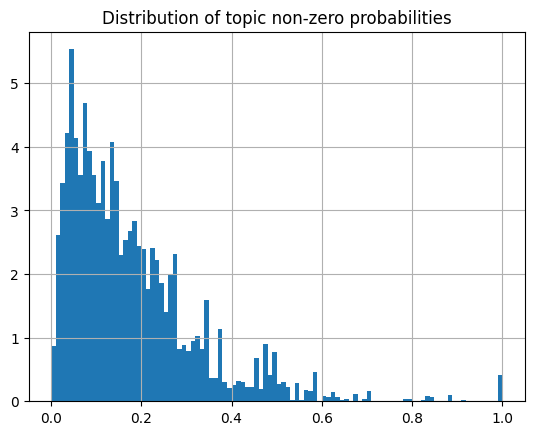

In [80]:
raw_distr = pd.Series(topic_distr.ravel())
raw_distr = raw_distr[raw_distr > 0]

ax = raw_distr.hist(bins = 100, range = [0, 1],
                                        weights = np.ones_like(raw_distr)*100/raw_distr.shape[0])
ax.set_title('Distribution of topic non-zero probabilities')

In [81]:
df['max_topic_distr'] = topic_distr.max(axis = 1)

In [82]:
1 - df[df.max_topic_distr > 0.05].shape[0]/df.shape[0]

0.05213715359323623

In [83]:
df = df.reset_index(drop=True)

In [86]:
df[(df.max_topic_distr > 0.1) & (df.questionID <= 100)].sample(10)

,questionID,questionTitle,questionText,questionLink,topic,therapistInfo,therapistURL,answerText,upvotes,views,split,basic_topic,merged_topic,merged_topic_repr,max_topic_distr
255,74,How can I resist the urge to cut?,"When I'm sad and alone, I want to cut myself.",https://counselchat.com/questions/how-can-i-resist-the-urge-to-cut,depression,"Lauren Ostrowski, MA, LPC, NCC, DCC, CCTPI tailor my therapeutic approach to each client's strengths and goals",https://counselchat.com/therapists/lauren-ostrowski-ma-lpc-ncc-dcc-cctp,"Try doing something physical. If you haven't exercised before, it is a good idea to get your doctor's approval first, but this can be helpful.The more you can find out about when you want to cut, the easier it will be to figure out what else you can do. If you are feeling sad or angry or nervous, look at what is leading up to those feelings and talk to someone about that.You said you are alone. I would see if you can find someone that you can trust to talk with about what you are going through. This could be a parent, a friend, someone at school, a coworker, or any number of other people.",0,45,train,0,0,"relationship, depressed, believe, love, away, abuse, upset, married, afraid, family",0.62
33,1,Do I have too many issues for counseling?,"I have so many issues to address. I have a history of sexual abuse, I’m a breast cancer survivor and I am a lifetime insomniac. I have a long history of depression and I’m beginning to have anxiety. I have low self esteem but I’ve been happily married for almost 35 years.\n I’ve never had counseling about any of this. Do I have too many issues to address in counseling?",https://counselchat.com/questions/do-i-have-too-many-issues-for-counseling,depression,Kerri ScullyLicensed Professional Counselor,https://counselchat.com/therapists/kerri-scully,There is no such thing as too many issues for counseling. Many issues are often interrelated and can all be worked on with some time and patience.,0,26,train,0,0,"relationship, depressed, believe, love, away, abuse, upset, married, afraid, family",0.47
2010,12,Do I have too many issues for counseling?,"I have so many issues to address. I have a history of sexual abuse, I’m a breast cancer survivor and I am a lifetime insomniac. I have a long history of depression and I’m beginning to have anxiety. I have low self esteem but I’ve been happily married for almost 35 years.\n I’ve never had counseling about any of this. Do I have too many issues to address in counseling?",https://counselchat.com/questions/do-i-have-too-many-issues-for-counseling,counseling-fundamentals,Debbie Gottlieb,https://counselchat.com/therapists/debbie-gottlieb,"The way it goes is that all your issues are connected. Once you work on one issue it will have a positive effect on all areas. Slowly each issue is addressed and actually less issues will need to be addressed directly since resolving one helps your overall wellness. So no, you do not have too many issues. Don’t give up. Get help now and see how your life can change for the better.",0,91,train,0,0,"relationship, depressed, believe, love, away, abuse, upset, married, afraid, family",0.47
26,1,Do I have too many issues for counseling?,"I have so many issues to address. I have a history of sexual abuse, I’m a breast cancer survivor and I am a lifetime insomniac. I have a long history of depression and I’m beginning to have anxiety. I have low self esteem but I’ve been happily married for almost 35 years.\n I’ve never had counseling about any of this. Do I have too many issues to address in counseling?",https://counselchat.com/questions/do-i-have-too-many-issues-for-counseling,depression,Shakeeta TorresFaith Based Mental Health Counselor,https://counselchat.com/therapists/shakeeta-torres,Absolutely not. I strongly recommending working on one issue/need at a time. In therapy you will set smart goals and objectives that will help you reach your goals. I see you as a survivor and not a victim. Best wishes to you.

In [90]:
doc_id = 211

In [91]:
topic_model.visualize_distribution(topic_distr[doc_id], min_probability=0.05)

In [92]:
# Visualize the token-level distributions
vis_df = topic_model.visualize_approximate_distribution(docs[doc_id], topic_token_distr[doc_id])
vis_df

,am,going,through,very,hard,time,and,so,depressed,My,parents,are,getting,divorce,and,lot,of,bad,things,are,happening,want,to,lull,myself
0_relationship_depressed_love_time,0.117,0.233,0.390,0.547,0.587,0.596,0.439,0.283,0.126,0.000,0.000,0.000,0.111,0.111,0.111,0.274,0.303,0.443,0.668,0.693,0.742,0.791,0.566,0.377,0.189
1_relationship_upset_wrong_girlfriend,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.102,0.204,0.325,0.325,0.223,0.122,0.000,0.000,0.000
2_depressed_family_tell_im,0.000,0.000,0.126,0.252,0.378,0.489,0.363,0.237,0.111,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.138,0.252,0.365,0.479,0.340,0.227,0.113
4_depressed_angry_home_time,0.000,0.000,0.284,0.569,0.853,1.405,1.593,1.782,1.970,1.419,0.946,0.473,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
5_daughter_child_school_normal,0.271,0.543,0.543,0.543,0.271,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [93]:
tmp_dfs = []

for thr in tqdm.tqdm(np.arange(0, 0.15, 0.001)):
    tmp_df = pd.DataFrame(list(map(lambda x: len(list(filter(lambda y: y >= thr, x))), topic_distr))).rename(
        columns = {0: 'num_topics'}
    )
    tmp_df['num_docs'] = 1

    tmp_df['num_topics_group'] = tmp_df['num_topics']\
        .map(lambda x: str(x) if x < 5 else '5+')

    tmp_df_aggr = tmp_df.groupby('num_topics_group', as_index = False).num_docs.sum()
    tmp_df_aggr['threshold'] = thr

    tmp_dfs.append(tmp_df_aggr)

100%|██████████| 150/150 [00:03<00:00, 42.14it/s]


In [94]:
num_topics_stats_df = pd.concat(tmp_dfs).pivot(index = 'threshold', values = 'num_docs',
                              columns = 'num_topics_group').fillna(0)

In [95]:
num_topics_stats_df = num_topics_stats_df.apply(lambda x: 100.*x/num_topics_stats_df.sum(axis = 1))

In [96]:
colormap = px.colors.sequential.YlGnBu
px.area(num_topics_stats_df,
       title = 'Distribution of number of topics',
       labels = {'num_topics_group': 'number of topics',
                'value': 'share of reviews, %'},
       color_discrete_map = {
          '0': colormap[0],
          '1': colormap[3],
          '2': colormap[4],
          '3': colormap[5],
          '4': colormap[6],
          '5+': colormap[7]
      })

In [97]:
threshold = 0.05

In [98]:
df['multiple_topics'] = list(map(
    lambda doc_topic_distr: list(map(
        lambda y: y[0], filter(lambda x: x[1] >= threshold,
                               (enumerate(doc_topic_distr)))
    )), topic_distr
))

In [99]:
tmp_data = []

for rec in df.to_dict('records'):
    if len(rec['multiple_topics']) != 0:
        mult_topics = rec['multiple_topics']
    else:
        mult_topics = [-1]

    for topic in mult_topics:
        tmp_data.append(
            {
                'topic': topic,
                'id': rec['questionID'],
                'hotel': rec['questionTitle'],
                'reviews_transl': rec['questionText']
            }
        )


mult_topics_df = pd.DataFrame(tmp_data)

In [103]:
list(mult_topics_df.columns)

['topic', 'id', 'hotel', 'reviews_transl']

In [104]:
tmp_data = []

for hotel in mult_topics_df.hotel.unique():
    for topic in mult_topics_df.topic.unique():
        tmp_data.append({
            'hotel': hotel,
            'topic_id': topic,
            'total_hotel_reviews': mult_topics_df[mult_topics_df.hotel == hotel].id.nunique(),
            'topic_hotel_reviews': mult_topics_df[(mult_topics_df.hotel == hotel)
                                                  & (mult_topics_df.topic == topic)].id.nunique(),
            'other_hotels_reviews': mult_topics_df[mult_topics_df.hotel != hotel].id.nunique(),
            'topic_other_hotels_reviews': mult_topics_df[(mult_topics_df.hotel != hotel)
                                                  & (mult_topics_df.topic == topic)].id.nunique()
        })

mult_topics_stats_df = pd.DataFrame(tmp_data)

In [105]:
mult_topics_stats_df['topic_hotel_share'] = 100*mult_topics_stats_df.topic_hotel_reviews/mult_topics_stats_df.total_hotel_reviews
mult_topics_stats_df['topic_other_hotels_share'] = 100*mult_topics_stats_df.topic_other_hotels_reviews/mult_topics_stats_df.other_hotels_reviews


In [106]:
from statsmodels.stats.proportion import proportions_ztest

In [107]:
mult_topics_stats_df['difference_pval'] = list(map(
    lambda x1, x2, n1, n2: proportions_ztest(
        count = [x1, x2],
        nobs = [n1, n2],
        alternative = 'two-sided'
    )[1],
    mult_topics_stats_df.topic_other_hotels_reviews,
    mult_topics_stats_df.topic_hotel_reviews,
    mult_topics_stats_df.other_hotels_reviews,
    mult_topics_stats_df.total_hotel_reviews
))

In [108]:
mult_topics_stats_df['sign_difference'] = mult_topics_stats_df.difference_pval.map(
    lambda x: 1 if x <= 0.05 else 0
)

def relative_actuality(d, sign):
    sign_percent = 1
    if sign == 0:
        return 'no diff'
    if (d >= -sign_percent) and (d <= sign_percent):
        return 'no diff'
    if d < -sign_percent:
        return 'lower'
    if d > sign_percent:
        return 'higher'

mult_topics_stats_df['diff_significance_total'] = list(map(
    relative_actuality,
    mult_topics_stats_df.topic_hotel_share - mult_topics_stats_df.topic_other_hotels_share,
    mult_topics_stats_df.sign_difference
))

In [109]:
import plotly
def get_color_sign(rel):
    if rel == 'no diff':
        return plotly.colors.qualitative.Set2[7]
    if rel == 'lower':
        return plotly.colors.qualitative.Set2[1]
    if rel == 'higher':
        return plotly.colors.qualitative.Set2[0]

def get_topic_representation_title(topic_model, topic):
    data = topic_model.get_topic(topic)
    data = list(map(lambda x: x[0], data))

    return ', '.join(data[:5]) + ', <br>         ' + ', '.join(data[5:])

def get_graphs_for_topic(t):
    topic_stats_df = mult_topics_stats_df[mult_topics_stats_df.topic_id == t]\
        .sort_values('total_hotel_reviews', ascending = False).set_index('hotel')


    colors = list(map(
        get_color_sign,
        topic_stats_df.diff_significance_total
    ))


    fig = px.bar(topic_stats_df.reset_index(), x = 'hotel', y = 'topic_hotel_share',
                title = 'Topic: %s' % get_topic_representation_title(topic_model,
                                                            topic_stats_df.topic_id.min()),
                text_auto = '.1f',
                labels = {'topic_hotel_share': 'share of reviews, %'},
                hover_data=['topic_id'])
    fig.update_layout(showlegend = False)
    fig.update_traces(marker_color=colors, marker_line_color=colors,
                  marker_line_width=1.5, opacity=0.9)


    topic_total_share = 100.*((topic_stats_df.topic_hotel_reviews + topic_stats_df.topic_other_hotels_reviews)\
        /(topic_stats_df.total_hotel_reviews + topic_stats_df.other_hotels_reviews)).min()
    print(topic_total_share)

    fig.add_shape(type="line",
        xref="paper",
        x0=0, y0=topic_total_share,
        x1=1, y1=topic_total_share,
        line=dict(
            color=colormap[8],
            width=3, dash="dot"
        )
    )

    fig.show()

In [110]:
 fig.show()

In [111]:
top_mult_topics_df = mult_topics_df.groupby('topic', as_index = False).id.nunique()

In [112]:
top_mult_topics_df['share'] = 100.*top_mult_topics_df.id/top_mult_topics_df.id.sum()
top_mult_topics_df['topic_repr'] = top_mult_topics_df.topic.map(
    lambda x: get_topic_representation(topic_model, x)
)

In [113]:
top_mult_topics_df = top_mult_topics_df.sort_values('id', ascending = False)
top_mult_topics_df.head(15)

,topic,id,share,topic_repr
1,0,726,18.02,"relationship, depressed, love, time, married, upset, times, feelings, self, away"
3,2,617,15.31,"depressed, family, tell, im, self, afraid, told, dont, upset, feel"
2,1,567,14.07,"relationship, upset, wrong, girlfriend, friend, normal, past, feelings, angry, really"
7,6,388,9.63,"abuse, teenager, normal, mean, upset, come, stress, depressed, tell, self"
8,7,374,9.28,"angry, feel, relationship, past, stress, 20s, im, female, wrong,"
4,3,303,7.52,"need, help, okay, say, understand, stress, act, tell, things, believe"
5,4,279,6.92,"depressed, angry, home, time, married, past, wife, having, sex,"
6,5,259,6.43,"daughter, child, school, normal, feels, girlfriend, afraid, thing, dont, going"
9,8,208,5.16,"daughter, child, normal, 20s, kids, act, early, times, relationship, school"
10,9,151,3.75,"child, married, past, feels, kids, ago, time, love, dont, years"


In [114]:
for t in top_mult_topics_df.head(32).topic.values:
    get_graphs_for_topic(t)

88.97058823529412


75.5201958384333


69.40024479804161


47.49082007343941


45.77723378212974


37.086903304773564


34.149326805385556


31.701346389228885


25.458996328029375


18.482252141982862


14.932680538555692


4.283965728274174


In [119]:
mult_topics_df[(mult_topics_df.topic == 2) & (mult_topics_df.reviews_transl.map(lambda x: 'refurb' in x))]


,topic,id,hotel,reviews_transl
